In [7]:
import pandas as pd
df = pd.read_csv("winequality-red.csv")

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
quality_mapping= {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [11]:
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [13]:
df.shape

(1599, 12)

In [15]:
df = df.sample(frac=1).reset_index(drop=True)

In [16]:
df_train = df.head(1000)

In [17]:
df_test = df.tail(599)

In [19]:
from sklearn import tree
from sklearn import metrics

In [30]:
clf = tree.DecisionTreeClassifier(max_depth=7)

In [31]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'
       ]

In [32]:
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=7)

In [33]:
train_predictions = clf.predict(df_train[cols])

In [34]:
test_predictions = clf.predict(df_test[cols])

In [35]:
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

In [36]:
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [37]:
train_accuracy

0.77

In [38]:
test_accuracy

0.6010016694490818

In [39]:
from sklearn import tree
from sklearn import metrics

In [40]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [42]:
%matplotlib inline

In [43]:
train_accuracies = [0.5]
test_accuracies = [0.5]

In [44]:
for depth in range(1,25):
    clf=tree.DecisionTreeClassifier(max_depth=depth)
    cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'
       ]
    clf.fit(df_train[cols], df_train.quality)
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    train_accuracy = metrics.accuracy_score(
    df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(
    df_test.quality, test_predictions)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

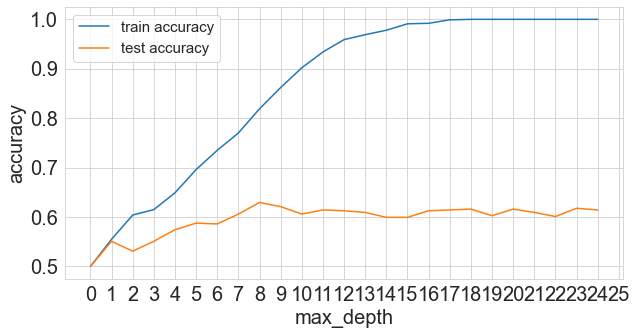

In [50]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(0,26,1))
plt.xlabel("max_depth",size=20)
plt.ylabel("accuracy",size=20)
plt.show()